## PARTE A
Transformación de Datos: Elige cuáles de las siguientes tareas son apropiadas para su dataset. Implementa las transformaciones que elegiste. Es importante que justifiques por qué las haces:

Detección y eliminación de Outliers

Encoding

Imputación de valores faltantes

Escalado de datos

Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA). Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - con este nuevo dataset transformado. 

Evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. 

¿Hay una mejora en su desempeño? 

Compara con el desempeño obtenido en el proyecto 01. Sea cual sea la respuesta, intenta explicar a qué se debe.

## PARTE B - Modelos Avanzados:

Elige dos de los modelos avanzados vistos Compara con el desempeño obtenido en el proyecto 01 (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). 

Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.

Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.
Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

## PARTE C - Interpretación de modelos: De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?
### DESAFÍO OPCIONAL
Aplica una técnica de Clustering sobre el dataset. Puedes combinar con técnicas de reducción de dimensionalidad para facilitar la visualización. ¿Qué clusters encuentras? ¿A qué pueden corresponder? Te dejamos preguntas que pueden servir como disparadoras: ¿qué barrios se parecen más entre sí?¿qué tipos de propiedades se parecen más entre sí?

### Checklist de Evaluacion
#### Sugerencias para desarrollar el proyecto:
Este proyecto no cuenta con mínimos entregables indicados en la consigna, pero ten en cuenta lo siguiente:

en la Parte A debes implementar al menos tres de las transformaciones de datos propuestas.

en la Parte B, al menos un modelo debe ser optimizado por Grid Search o Random Search; el otro puede ser optimizado por búsqueda manual (es decir, puedes dejar los mejores parámetros que encontraste probando ).

en la Parte C, debes responder al menos una pregunta. Obviamente, ¡cuanto más hagas, más aprenderás y mejor será tu proyecto!

## PARTE A 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
from pandas import plotting
from matplotlib.ticker import ScalarFormatter
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import math
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

import xgboost as xgb
from xgboost import plot_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree as Arbol
from sklearn.tree import export_graphviz
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import KMeans

### Filtrado de datos

In [2]:
df = pd.read_csv(r'DS_Proyecto_01_Datos_Properati.csv')
print(df.shape)
df.head()

(146660, 19)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


### Filtrando datos iniciales

Conocemos de antemano algunas características de los datos que sugieren cierta limitación de los mismos que nos ayudan a lograr algún grado de estandarización de las muestras mejor y a su vez simplificar la estructura para un mejor rendimiento.

Para este caso se aplicarán los siguientes pasos:

    El tipo de propiedad se limitará a Casa, Departamentos y PH, por ser predominantes frente a otro tipo de propiedad.

    Las Zonas serán limitadas a la Capital Federal considerando que es posible de esta segmentación obtener un modelo bastante escalable por su dispersión en barrios, a diferencia de la otras zonas.


In [3]:
df_cf = df[df.property_type.isin(['Departamento','Casa','PH']) & df.l2.isin(['Capital Federal'])]
df_cf.shape

(91485, 19)

### Ajustando la superficies


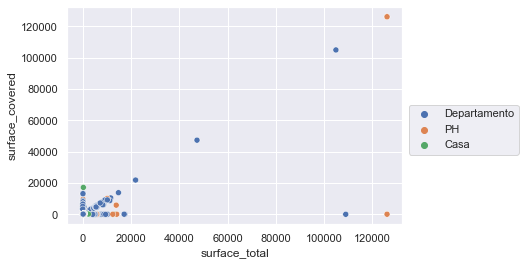

In [4]:
#existen casos donde la superficie cubierta es mayo que la superficie total. 
df_cf2 = df_cf.copy()
sns.scatterplot(data=df_cf2, x='surface_total', y='surface_covered',hue="property_type")
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)

In [5]:
df_cf3 = df_cf2.drop(df_cf2.loc[df_cf2['surface_covered'] > df_cf2['surface_total']].index)

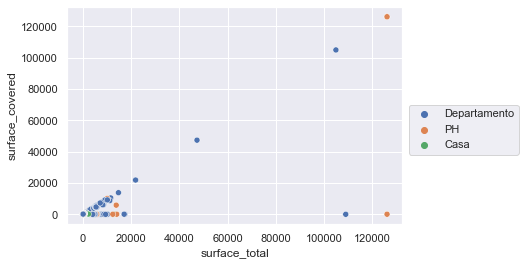

In [6]:
#existen casos donde la superficie cubierta es mayo que la superficie total. 
sns.scatterplot(data=df_cf3, x='surface_total', y='surface_covered',hue="property_type")
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)

### Filas duplicadas

Filas que tienen los mismos valores para cada columna

In [7]:
duplicado = df_cf3.duplicated()
df_cf3[duplicado].count()

start_date         1611
end_date           1611
created_on         1611
lat                1458
lon                1458
l1                 1611
l2                 1611
l3                 1611
rooms              1611
bedrooms           1611
bathrooms          1587
surface_total      1411
surface_covered    1400
price              1611
currency           1611
title              1611
description        1611
property_type      1611
operation_type     1611
dtype: int64

In [8]:
print(df_cf3.shape)
#eliminamos los datos duplicados
df_cf3.drop_duplicates(inplace=True)
print(df_cf3.shape)

(90725, 19)
(89114, 19)


### Reduciendo columnas
Limitamos columnas mas relevantes

In [9]:
for i in range(df_cf3.shape[1]):
    print(i,len(pd.unique(df_cf3.iloc[:,i])))

0 362
1 408
2 362
3 31132
4 31401
5 1
6 1
7 57
8 19
9 16
10 14
11 716
12 572
13 5179
14 1
15 42579
16 57932
17 3
18 1


Exsiten columnas con datos unicos lo que puede causar errores por parte de los modelos. Las columnas: L1, L2, Currency y Operation Type son columnas de valores unicos

#### columnas con pocos valores

In [10]:
for i in range(df_cf3.shape[1]):
    num=len(pd.unique(df_cf3.iloc[:,i]))
    porcentaje=float(num)/df_cf3.shape[0]*100
    print("%d, %d, %.1f%%"%(i,num,porcentaje))

0, 362, 0.4%
1, 408, 0.5%
2, 362, 0.4%
3, 31132, 34.9%
4, 31401, 35.2%
5, 1, 0.0%
6, 1, 0.0%
7, 57, 0.1%
8, 19, 0.0%
9, 16, 0.0%
10, 14, 0.0%
11, 716, 0.8%
12, 572, 0.6%
13, 5179, 5.8%
14, 1, 0.0%
15, 42579, 47.8%
16, 57932, 65.0%
17, 3, 0.0%
18, 1, 0.0%


Importante tener presente que la columna 14 (Property Type) muestra bajo porcentaje dado que solo estamos trabajadno con tres categorias.

In [11]:
df_cf3 = df_cf3.drop(["start_date","end_date","title","description","l1","l2","currency","operation_type"],axis=1)

#### Correlacion

Luego realizar un primer pre poceso de datos podemos ver que las correlaciones entre las variables respecto del precio en algunos casos son bastante bajas, por que es posible realizar algunas mejoras al set de datos

<AxesSubplot:>

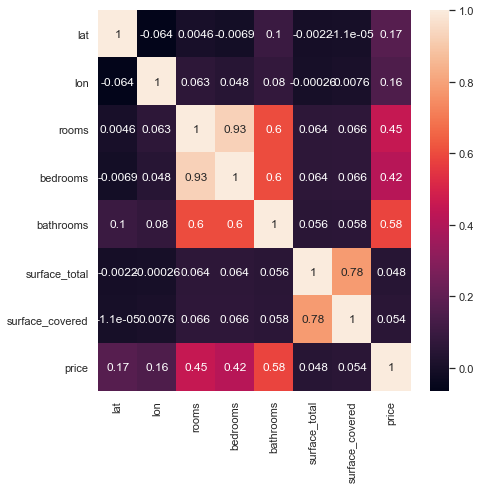

In [12]:
fig =plt.subplots(figsize=(7,7))
sns.heatmap(df_cf3.corr(), annot=True)

### Datos Nulos

In [68]:
df_cf4 = df_cf3.copy()

In [69]:
df_cf4.isnull().sum()

created_on            0
lat                4376
lon                4390
l3                    0
rooms                 0
bedrooms              0
bathrooms          2139
surface_total      8717
surface_covered    9024
price                 0
property_type         0
dtype: int64

Si bien la cantidad de datos nulos no es relevante por el momento, esto no quiere decir que alguna actualizacion los datos pueden tener una mayor cantidad de nulos por lo cual evaluaremos diferentes imputaciones para determinar las mas precisa y estandar a la vez

#### imputacion de datos nulos

In [70]:
#Definimos variables de preuba y testeo segun el modelo 1
X= df_cf4.drop(["price","created_on","lat","lon","property_type","l3"],axis=1)
#X= df_cf4[['lat',"lon","bathrooms",'surface_total','surface_covered']]
y = df_cf4["price"]
X.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered
0,7.0,7.0,2.0,140.0,140.0
1,2.0,1.0,2.0,70.0,58.0
2,2.0,1.0,1.0,45.0,45.0
3,2.0,1.0,1.0,85.0,50.0
5,2.0,1.0,1.0,56.0,56.0


In [71]:
X.isnull().sum()

rooms                 0
bedrooms              0
bathrooms          2139
surface_total      8717
surface_covered    9024
dtype: int64

#### Evaluando imputacion de datos faltantes en TreeRegressor  con una profundidad de 10 que muestra una menor error entre tarin y test

Evaluaremos los valores faltantes con tres tecnicas diferente de imputacion, los hiperparmetros estaran dados por defecto considerando que solo pretendemos ver que tecnica tiene un mejor rendimiento.

In [72]:
#definimos el modelo
tree = DecisionTreeRegressor()
resultado = []
tipos = ['mean','median','most_frequent','constant']

#funcion para evaluar modelos con Arboles.
for t in tipos:
    imputer = SimpleImputer(strategy=t)
    imputer.fit(X)
    X_trans= imputer.transform(X)
    
    tree= DecisionTreeRegressor( max_depth=10,random_state=42)
    tree.fit(X_trans,y)
    y_pred= tree.predict(X_trans)
    
    MAE=mean_absolute_error(y,y_pred)
    RMSE=np.sqrt(mean_squared_error(y,y_pred))
    r2 = metrics.r2_score(y, y_pred)
    resultado.append(r2)
    
    #imprimimos los resultado en funcion del precio que queremos estimar   
    print('RSME',RMSE.round(0),"Segun",t)
    print('MAE',MAE.round(0),"Segun",t)
    print("----------------------------------------")

RSME 132791.0 Segun mean
MAE 62675.0 Segun mean
----------------------------------------
RSME 132767.0 Segun median
MAE 62723.0 Segun median
----------------------------------------
RSME 132253.0 Segun most_frequent
MAE 62424.0 Segun most_frequent
----------------------------------------
RSME 131878.0 Segun constant
MAE 62199.0 Segun constant
----------------------------------------


In [73]:
print('Missing: %d' % sum(np.isnan(X_trans).flatten()))

Missing: 0


#### Evaluando Vecinos mas cercanos en la imputacion de faltantes.

        Utilizaremos para efectos de rendimineto 6 vecinos, considerando que ya hemos evaluado los hiperparametros de mejor rendimiento.

In [62]:
vecinos = [6]
for v in vecinos:
    KNN_imputer=KNNImputer(n_neighbors=v)
    KNN_imputer.fit(X)
    X_knn= KNN_imputer.transform(X)
    tree = DecisionTreeRegressor(max_depth=20,random_state=42)
    tree.fit(X_knn,y)
    y_pred = tree.predict(X_knn)
    r2 = metrics.r2_score(y, y_pred)
    MAE=mean_absolute_error(y,y_pred)
    RMSE=np.sqrt(mean_squared_error(y,y_pred))
    resultado.append(r2)
    print("La cantidad de vecinos utilizados--->",v)
    print('RSME',RMSE.round(0))
    print('MAE',MAE.round(0))
    print("----------------------------------------")

La cantidad de vecinos utilizados---> 6
RSME 73968.0
MAE 31716.0
----------------------------------------


In [63]:
print('Missing: %d' % sum(np.isnan(X_knn).flatten()))

Missing: 0


##### De las tecnicas aplicadas podemos destacar Knn con 6 vecinos  es la que mejor resultado muestra a la hora de impurtar datos faltantes.

### Aplicacion por Knn

Aplicaremos constant de SimpleImputer a los datos faltantes del dataset

In [75]:
df_cf4.isnull().sum()

created_on            0
lat                4376
lon                4390
l3                    0
rooms                 0
bedrooms              0
bathrooms          2139
surface_total      8717
surface_covered    9024
price                 0
property_type         0
dtype: int64

In [76]:
KNN_imputer=KNNImputer(n_neighbors=6)
KNN_imputer=KNN_imputer.fit(df_cf4.iloc[:,6:9])
df_cf4.iloc[:,6:9]=KNN_imputer.transform(df_cf4.iloc[:,6:9])

In [78]:
KNN_imputer=KNNImputer(n_neighbors=6)
KNN_imputer=KNN_imputer.fit(df_cf4.iloc[:,1:3])
df_cf4.iloc[:,1:3]=KNN_imputer.transform(df_cf4.iloc[:,1:3])

In [79]:
df_cf4.isnull().sum()

created_on         0
lat                0
lon                0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

In [80]:
df_cf4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89114 entries, 0 to 146558
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   created_on       89114 non-null  object 
 1   lat              89114 non-null  float64
 2   lon              89114 non-null  float64
 3   l3               89114 non-null  object 
 4   rooms            89114 non-null  float64
 5   bedrooms         89114 non-null  float64
 6   bathrooms        89114 non-null  float64
 7   surface_total    89114 non-null  float64
 8   surface_covered  89114 non-null  float64
 9   price            89114 non-null  float64
 10  property_type    89114 non-null  object 
dtypes: float64(8), object(3)
memory usage: 8.2+ MB


#### Revisamos las correlaciones luego del preproceso realizado

<AxesSubplot:>

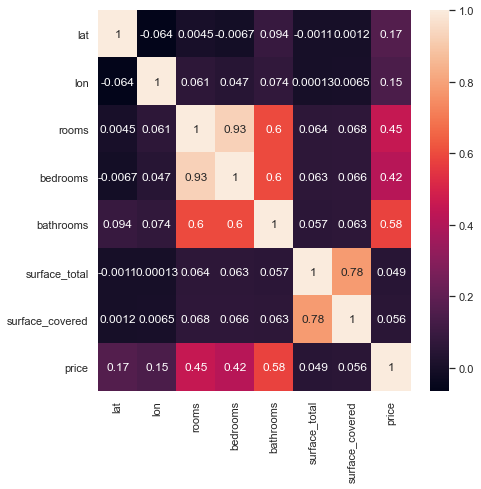

In [81]:
fig =plt.subplots(figsize=(7,7))
sns.heatmap(df_cf4.corr(), annot=True)

### Tratamiento de Outiers

#### Metodo IQR

    utilizaremos el metodo IQR y lo aplicaremos a todo el set de datos.

In [82]:
df_cf5=df_cf4.copy()

In [83]:
#definimos los cuantiles
Q1= df_cf5.quantile(0.25)
Q3= df_cf5.quantile(0.75)
IQR = Q3-Q1
#aplicamos a todas las columnas del df
df_cf5=df_cf5[~((df_cf5<(Q1-1.5*IQR))|(df_cf5>(Q3+1.5*IQR))).any(axis=1)]
df_cf5.shape

<ipython-input-83-7827bda35ebf>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_cf5=df_cf5[~((df_cf5<(Q1-1.5*IQR))|(df_cf5>(Q3+1.5*IQR))).any(axis=1)]
<ipython-input-83-7827bda35ebf>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_cf5=df_cf5[~((df_cf5<(Q1-1.5*IQR))|(df_cf5>(Q3+1.5*IQR))).any(axis=1)]


(75582, 11)

Text(0.5, 0, 'property type')

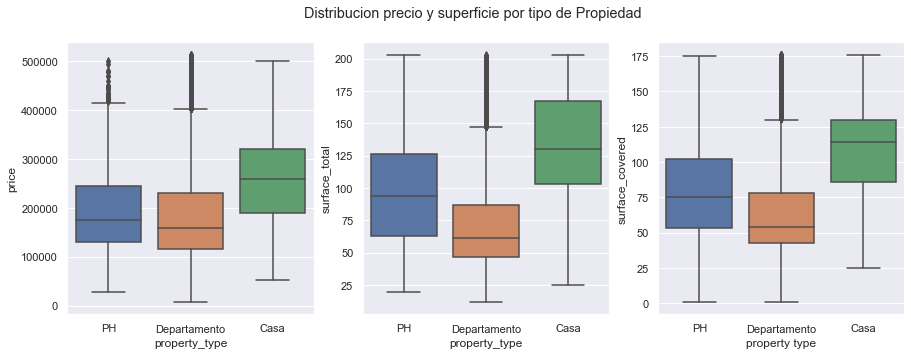

In [84]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,5))
fig.suptitle('Distribucion precio y superficie por tipo de Propiedad')
sns.boxplot(data=df_cf5, x='property_type', y='price',ax=ax1)
sns.boxplot(data=df_cf5, x='property_type', y='surface_total',ax=ax2)
sns.boxplot(data=df_cf5, x='property_type', y='surface_covered',ax=ax3)
plt.xlabel ( 'property type' ) 

<AxesSubplot:>

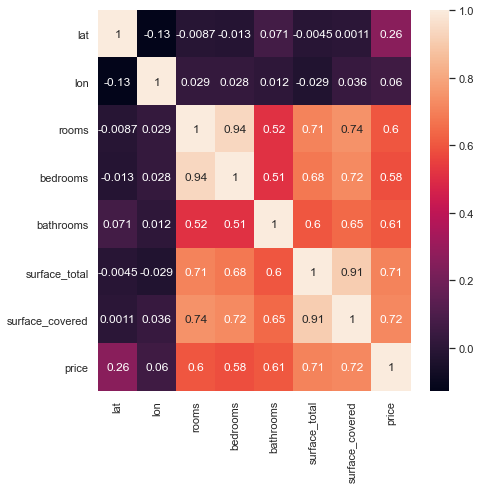

In [85]:
fig =plt.subplots(figsize=(7,7))
sns.heatmap(df_cf5.corr(), annot=True)

 ### Podemos observar que luego de preprocesar los datos y una vez aplicado la eliminacion de outliers las correlaciones entre las variables se vuelve mas relevante, sobre en cuanto al precio de la propiedad.

# Encoding

    Procesaremos las columnas [ 'created_on', 'property_type'], considerando que podemos utilizar el año creacion y al tipo de propiedad como variables categóricas relevante y transformarlas a numéricas, así también podremos extraer la variable year del alguna fecha y ver qué relevancia podría tener la fecha de una propiedad en su precio.

In [86]:
df_cf5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75582 entries, 1 to 146557
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   created_on       75582 non-null  object 
 1   lat              75582 non-null  float64
 2   lon              75582 non-null  float64
 3   l3               75582 non-null  object 
 4   rooms            75582 non-null  float64
 5   bedrooms         75582 non-null  float64
 6   bathrooms        75582 non-null  float64
 7   surface_total    75582 non-null  float64
 8   surface_covered  75582 non-null  float64
 9   price            75582 non-null  float64
 10  property_type    75582 non-null  object 
dtypes: float64(8), object(3)
memory usage: 8.9+ MB


### Aplicando LabelEncoder

#### Transformando date

In [87]:
#transformamos la columan de create on en formato de fecha
df_cf5["date"] = pd.to_datetime(df_cf5.created_on, format="%Y-%m-%d")
df_cf5.drop("created_on",axis=1,inplace=True)
df_cf5.head(5)

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,date
1,-34.624056,-58.412110,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,2019-10-17
2,-34.593569,-58.427474,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH,2019-10-17
3,-34.581294,-58.436754,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH,2019-10-17
5,-34.593779,-58.441239,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH,2019-10-17
6,-34.600988,-58.433061,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,PH,2019-10-17


In [88]:
#creamos la columna año para poder guardar el año de la propiedad.
df_cf5['year'] = pd.DatetimeIndex(df_cf5['date']).year
df_cf5.drop("date",axis=1,inplace=True)
df_cf5.head()

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,year
1,-34.624056,-58.412110,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,2019
2,-34.593569,-58.427474,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH,2019
3,-34.581294,-58.436754,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH,2019
5,-34.593779,-58.441239,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH,2019
6,-34.600988,-58.433061,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,PH,2019


In [89]:
#transoformamos primero la variable year
Labelencoder= LabelEncoder()
Labelencoder.fit(df_cf5['year'])
df_cf5['years']=Labelencoder.transform(df_cf5['year'])
df_cf5.drop('year', axis=1,inplace=True)

In [90]:
list(Labelencoder.classes_)

[2019, 2020]

In [91]:
df_cf5['years'].unique()

array([0, 1], dtype=int64)

In [92]:
#transoformamos primero la variable tipo de propiedad
Labelencoder= LabelEncoder()
Labelencoder.fit(df_cf5["property_type"])
df_cf5["Tipo_propiedad"] = Labelencoder.transform(df_cf5["property_type"])
df_cf5.drop("property_type",axis=1,inplace=True)

In [93]:
list(Labelencoder.classes_)

['Casa', 'Departamento', 'PH']

In [94]:
df_cf5['Tipo_propiedad'].unique()

array([2, 1, 0])

0= casa 1= departamento 2=ph

### Aplicando get_dummies a provincia L3

In [95]:
#guardaremos una copia para los cluster
dataset_cluster= df_cf5.copy()

In [96]:
df_cf5 = pd.get_dummies(data=df_cf5,prefix="district",columns=["l3"],drop_first=True)

In [97]:
df_cf5.head()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,years,Tipo_propiedad,...,district_Villa General Mitre,district_Villa Lugano,district_Villa Luro,district_Villa Ortuzar,district_Villa Pueyrredón,district_Villa Real,district_Villa Santa Rita,district_Villa Soldati,district_Villa Urquiza,district_Villa del Parque
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,0,2,...,0,0,0,0,0,0,0,0,0,0
5,-34.593779,-58.441239,2.0,1.0,1.0,56.0,56.0,150000.0,0,2,...,0,0,0,0,0,0,0,0,0,0
6,-34.600988,-58.433061,2.0,1.0,1.0,70.0,70.0,159500.0,0,2,...,0,0,0,0,0,0,0,0,0,0


In [98]:
df_cf5.shape

(75582, 65)

<AxesSubplot:>

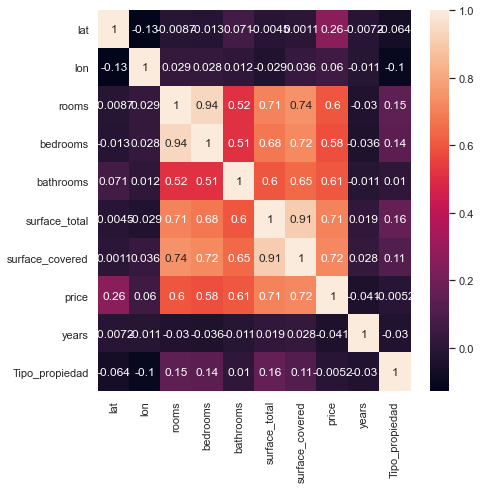

In [99]:
fig =plt.subplots(figsize=(7,7))
dataset_prob=df_cf5[["lat","lon","rooms","bedrooms","bathrooms","surface_total","surface_covered","price","years","Tipo_propiedad"]]
dataset_prob.head()
sns.heatmap(dataset_prob.corr(), annot=True)

# Escalado de datos

#### Evaluaremos diferentes tecnicas para el escalado de datos y evaluaremos la mejor opcion para nuestro modelo.

In [197]:
df_cf6 = df_cf5.copy()

In [198]:
from sklearn import preprocessing

In [199]:
#separamos nuestros datos en x e y 
X = df_cf6.drop("price",axis=1)
y = df_cf6["price"]

In [200]:
X.head()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,years,Tipo_propiedad,district_Agronomía,...,district_Villa General Mitre,district_Villa Lugano,district_Villa Luro,district_Villa Ortuzar,district_Villa Pueyrredón,district_Villa Real,district_Villa Santa Rita,district_Villa Soldati,district_Villa Urquiza,district_Villa del Parque
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
5,-34.593779,-58.441239,2.0,1.0,1.0,56.0,56.0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
6,-34.600988,-58.433061,2.0,1.0,1.0,70.0,70.0,0,2,0,...,0,0,0,0,0,0,0,0,0,0


In [201]:
# Primero evaluamos el metodo mas optimo de para el escalado
robust_sc = preprocessing.RobustScaler()
standard_sc = preprocessing.StandardScaler() 
minmax_sc = preprocessing.MinMaxScaler() 

In [202]:
for x in [robust_sc,standard_sc,minmax_sc]:
    scaler = x.fit(X)
    X_new = x.transform(X)
    
    tree = DecisionTreeRegressor(max_depth=10,random_state=42)
    tree.fit(X_new,y)
    y_pred = tree.predict(X_new)
    
    r2 = metrics.r2_score(y, y_pred)
    MAE=mean_absolute_error(y,y_pred)
    RMSE=np.sqrt(mean_squared_error(y,y_pred))
    resultado.append(r2)
    
    print("El escalado Utilizado--->",x)
    print("R2 segun el tipo de estrategia:",r2)
    print("RMSE segun el tipo de estrategia:",RMSE.round(0))
    print('MAE',MAE.round(0),"Segun",t)
    print("----------------------------------------")

El escalado Utilizado---> RobustScaler()
R2 segun el tipo de estrategia: 0.8125259056761325
RMSE segun el tipo de estrategia: 39955.0
MAE 27380.0 Segun constant
----------------------------------------
El escalado Utilizado---> StandardScaler()
R2 segun el tipo de estrategia: 0.8125259056761325
RMSE segun el tipo de estrategia: 39955.0
MAE 27380.0 Segun constant
----------------------------------------
El escalado Utilizado---> MinMaxScaler()
R2 segun el tipo de estrategia: 0.8125259056761325
RMSE segun el tipo de estrategia: 39955.0
MAE 27380.0 Segun constant
----------------------------------------


##### Escalado sin tratar Y

In [203]:
X = df_cf6.drop("price",axis=1)
y = df_cf6["price"]

In [204]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [205]:
X_train.shape,X_test.shape

((52907, 64), (22675, 64))

In [206]:
for x in [robust_sc,standard_sc,minmax_sc]:
    scaler = x.fit(X_train)
    X_train_new = x.transform(X_train)
    X_test_new = x.transform(X_test)
        
    tree = DecisionTreeRegressor(max_depth=10,random_state=42)
    tree.fit(X_train_new,y_train)
    y_pred = tree.predict(X_test_new)
    
    r2 = metrics.r2_score(y_test, y_pred)
    MAE=mean_absolute_error(y_test,y_pred)
    RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
    resultado.append(r2)
    print("El escalado utilizado--->",x)
    print("R2 segun el tipo de estrategia:",r2)
    print("RMSE segun el tipo de estrategia:",RMSE)
    print('MAE',MAE.round(0),"Segun",t)
    print("----------------------------------------")

El escalado utilizado---> RobustScaler()
R2 segun el tipo de estrategia: 0.7943095951571159
RMSE segun el tipo de estrategia: 42109.90827880705
MAE 28875.0 Segun constant
----------------------------------------
El escalado utilizado---> StandardScaler()
R2 segun el tipo de estrategia: 0.7944767284444253
RMSE segun el tipo de estrategia: 42092.79664528994
MAE 28861.0 Segun constant
----------------------------------------
El escalado utilizado---> MinMaxScaler()
R2 segun el tipo de estrategia: 0.7943896310659833
RMSE segun el tipo de estrategia: 42101.71481761607
MAE 28867.0 Segun constant
----------------------------------------


### Aplicando escalado con min max scaler, aun que otras tecnicas muestran igual renimiento y son mejores que sin escalar la variable Y

In [207]:
minmax_sc = preprocessing.MinMaxScaler() 
#guardamos las varibles 
X_train=minmax_sc.fit_transform(X_train)
X_test=minmax_sc.transform(X_test)

In [208]:
tree = DecisionTreeRegressor(max_depth=10,random_state=42)
tree.fit(X_train,y_train)
    
y_pred = tree.predict(X_test)
r2 = metrics.r2_score(y_test, y_pred)
MAE=mean_absolute_error(y_test,y_pred)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))


print("R2 segun el tipo de estrategia:",r2)
print("RMSE segun el tipo de estrategia:",RMSE)
print('MAE',MAE.round(0),"Segun",t)

R2 segun el tipo de estrategia: 0.7943896310659833
RMSE segun el tipo de estrategia: 42101.71481761607
MAE 28867.0 Segun constant


# Reducionedo Dimensionalidad

    Para este caso utilizaremos PCA y SVD sobre el modelo seleccionado 

In [ ]:
X_train.shape,X_test.shape

In [217]:
X_full_test =X_test.copy()
X_full_train = X_train.copy()

### PCA

In [213]:
pca_p=PCA

for i in range(2,65):
    pca_p=PCA(n_components=i,random_state=42)
    X_train_new=pca_p.fit_transform(X_train)
    X_test_new=pca_p.transform(X_test)
    
    tree = DecisionTreeRegressor(max_depth=10,random_state=42)
    tree.fit(X_train_new,y_train)
    
    y_pred = tree.predict(X_test_new)
    r2 = metrics.r2_score(y_test, y_pred)
    RMSE=np.sqrt(mean_squared_error(y_test,y_pred))

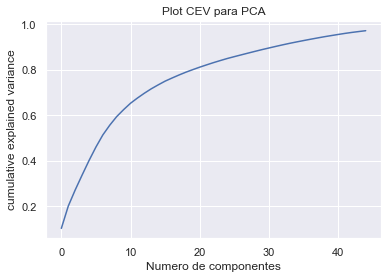

In [214]:
pca = PCA(45).fit(X_test)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Plot CEV para PCA")
plt.xlabel('Numero de componentes')
plt.ylabel('cumulative explained variance');

### SVD


In [216]:
svd=TruncatedSVD

for i in range(2,64):
    svd=TruncatedSVD(n_components=i,random_state=42)
    X_train_new=svd.fit_transform(X_train)
    X_test_new=svd.transform(X_test)
    
    tree = DecisionTreeRegressor(max_depth=10,random_state=42)
    tree.fit(X_train_new,y_train)
    
    y_pred = tree.predict(X_test_new)

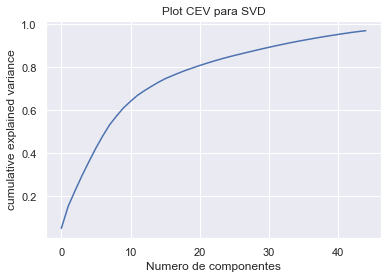

In [218]:
svd = TruncatedSVD(45).fit(X_test)
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.title("Plot CEV para SVD")
plt.xlabel('Numero de componentes')
plt.ylabel('cumulative explained variance');

#### Aplicacion de PCA con 30 componente considerando que es capas de explicar mas del 80% de la varianza

In [219]:
pca_p=PCA(n_components=30,random_state=42)
X_train=pca_p.fit_transform(X_train)
X_test=pca_p.transform(X_test)


tree = DecisionTreeRegressor(max_depth=10,random_state=42)
tree.fit(X_train,y_train)
    
y_pred = tree.predict(X_test)
r2 = metrics.r2_score(y_test, y_pred)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
MAE=mean_absolute_error(y_test,y_pred)
print("----------------------------------------")
print("R2 segun el tipo de estrategia:",r2)
print("RMSE segun el tipo de estrategia:",RMSE)
print("MAE segun el tipo de estrategia:",MAE)
print("----------------------------------------")

----------------------------------------
R2 segun el tipo de estrategia: 0.7644793029992152
RMSE segun el tipo de estrategia: 45060.065422883235
MAE segun el tipo de estrategia: 30240.95578665391
----------------------------------------


In [220]:
X_train.shape,X_test.shape

((52907, 30), (22675, 30))

# Reentrenando el modelo del proyecto_1

Modelo de Arbol de decision con Optimizacion:

Una vez evaluado los hiperparametros podemos determinar que la profundidad del arbol en 20 y para los vecinos un valor de 3 es mas optimo
    
    # Profundidad del arbol en 20
    # mae_train: 50043


In [221]:
X_train.shape

(52907, 30)

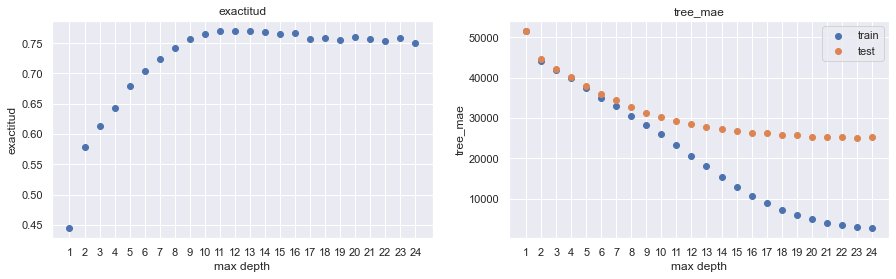

In [222]:
#evaluando la profundidad del arbol
MAX_DEPTH_range = range(1, 25)
scores = []
arbol_mae_train_pred=[]
arbol_mae_test_pred=[]

for k in MAX_DEPTH_range:
    arbol_regressor = DecisionTreeRegressor(max_depth=k,random_state=42)
    arbol_regressor.fit(X_train, y_train)
    scores.append(arbol_regressor.score(X_test, y_test))
    
    y_train_pred = arbol_regressor.predict(X_train)
    
    arbol_mae_train = metrics.mean_absolute_error(y_train, y_train_pred)
    arbol_mae_train_pred.append(arbol_mae_train)
    
    y_test_pred = arbol_regressor.predict(X_test)
    
    arbol_mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
    arbol_mae_test_pred.append(arbol_mae_test)

fig = plt.figure(figsize=(15,4))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(MAX_DEPTH_range,scores)
ax2.scatter(MAX_DEPTH_range,arbol_mae_train_pred,label="train")
ax2.scatter(MAX_DEPTH_range,arbol_mae_test_pred,label="test")

ax1.set_xticks(MAX_DEPTH_range)
ax2.set_xticks(MAX_DEPTH_range)

ax2.legend()

ax1.set_title('exactitud')
ax1.set_xlabel('max depth')
ax1.set_ylabel('exactitud')

ax2.set_title('tree_mae')
ax2.set_xlabel('max depth')
ax2.set_ylabel('tree_mae')

plt.show()

##### Podemos observar que  con una profundidad cercana a 9 el modelo logra una exactitud de 75% y por otro lado un MAE con var bastante rezonable.

### Parametros modelo 1 con Tree Regressor

In [224]:
#Entrenando en modelo 1 con una Max depth de 20
arbol_proyecto1 = DecisionTreeRegressor(max_depth= 20,random_state=42)
arbol_proyecto1.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=20, random_state=42)

### Parametros modelo 2 con Tree Regressor

In [226]:
#Entrenando en modelo 2 con una Max depth de 9
arbol_proyecto2 = DecisionTreeRegressor(max_depth= 9,random_state=42)
arbol_proyecto2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9, random_state=42)

### Comparando modelos con nuevos datos e hiperparmetros

Modelo: Arbol Proyecto 1
R2 en test: 0.7594097262564565
R2 en train: 0.7594097262564565
--------------------------
RMSE en train: 10948.449815571314
RMSE en test: 45542.44181360307
--------------------------
MAE en train: 4900.238246007715
MAE en test: 25349.016225410007
--------------------------


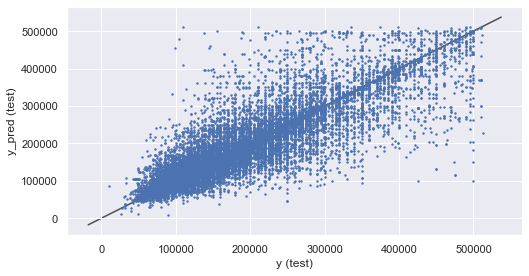

Modelo: Arbol Proyecto 2
R2 en test: 0.756423658772222
R2 en train: 0.756423658772222
--------------------------
RMSE en train: 40432.14338726757
RMSE en test: 45824.19351323045
--------------------------
MAE en train: 28183.918307961132
MAE en test: 31274.929701022782
--------------------------


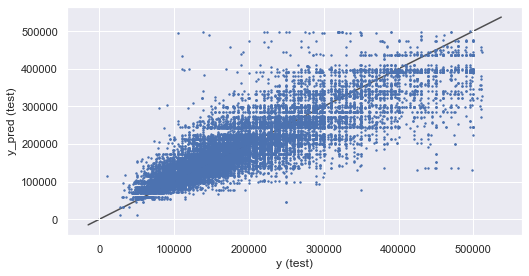

In [234]:
models = ["Arbol Proyecto 1","Arbol Proyecto 2"]

for i, model in enumerate([arbol_proyecto1, arbol_proyecto2]):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
   

    print(f'Modelo: {models[i]}')
    
    r2_train= metrics.r2_score(y_train, y_train_pred)
    r2_test= metrics.r2_score(y_test, y_test_pred)
    
#     adj_r2_train = 1 - ((1 - r2_train) * (len(y_train) - 1)) / (len(y_train) - X_train.shape[1] - 1)
#     adj_r2_test = 1 - ((1 - r2_test) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1)

    RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
    RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
    
    MAE_train = metrics.mean_absolute_error(y_train, y_train_pred)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_pred)
  

    print("R2 en test:", r2_test)
    print("R2 en train:", r2_test)
    print("--------------------------")
    print("RMSE en train:",RMSE_train)
    print("RMSE en test:",RMSE_test)
    print("--------------------------")
    print("MAE en train:", MAE_train)
    print("MAE en test:", MAE_test)
    print("--------------------------")

    plt.figure(figsize = (14,4))
   
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

## Conclusiones parte A

Inicialmente nuestro modelo lograba con una Profundidad del arbol en 20 un mae_train de 50043
En esta segunda etapa utilizando los mismo hiperparametros pero con datos preprocesados optenemos un MAE en Train de 4900 y
un MAE en trainde 25349, con un error de cercano a los 23651 entre train y test.

Luego corregimos los hiperparametros reduciendolos a 9 con nuestros datos ya escalados obteniendo un MAE test de 28183 y un MAE en train de 31274 con error de 3091 lo que sin duda es bastante bueno pero aun nuestro modelo se equivoca entre 28 mil y 31 mil unidades monetarias, lo que para un precio es mucha varianza.

De todas manera nuestro modelo mejora luego del preprocesamiento de datos y optimizacion de hiperparametros